# Aquisição dos modelos para detecção de Mãos

Download dos pesos do drive no link: https://drive.google.com/file/d/1Ck0lgrQaIzFwZnPWTrMlaHi6kNelKSu_/view?usp=sharing

Download do modelo no Github:

In [25]:
!git clone https://github.com/LucaswasTaken/Acessibilidade_Parte_3_Angulo_dedos.git

Cloning into 'Acessibilidade_Parte_3_Angulo_dedos'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


# Detecção de mão em uma imagem

In [16]:
from __future__ import division
import cv2
import time
import numpy as np

protoFile = "/content/Acessibilidade_Parte_3_Angulo_dedos/pose_deploy.prototxt"
weightsFile = "pose_iter_102000.caffemodel"
nPoints = 22
POSE_PAIRS = [ [0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20] ]
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

frame = cv2.imread("/content/Acessibilidade_Parte_3_Angulo_dedos/hand.jpg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
aspect_ratio = frameWidth/frameHeight

threshold = 0.1

# input image dimensions for the network
inHeight = 368
inWidth = int(((aspect_ratio*inHeight)*8)//8)
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()

# Empty list to store the detected keypoints
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if prob > threshold :
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
    else :
        points.append((0,0))
print(points)


[(88, 328), (69, 291), (60, 235), (69, 181), (69, 143), (97, 199), (124, 152), (143, 125), (162, 106), (125, 208), (153, 153), (180, 125), (199, 97), (144, 226), (180, 180), (199, 152), (217, 125), (171, 236), (199, 208), (209, 189), (227, 171), (0, 0)]


# Detecção de mãos em um vídeo

forward = 7.661949872970581
Time Taken for frame = 7.679963111877441


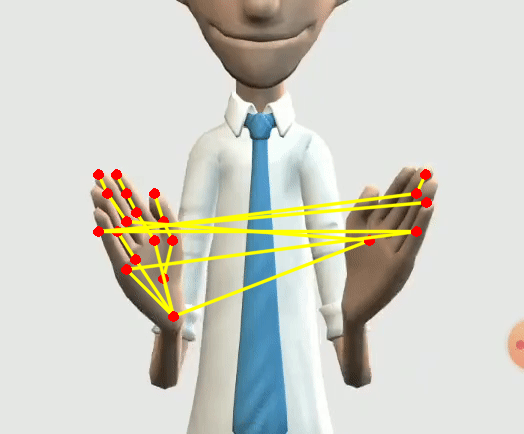

total = 7.717315435409546
forward = 7.684938669204712
Time Taken for frame = 7.7029712200164795


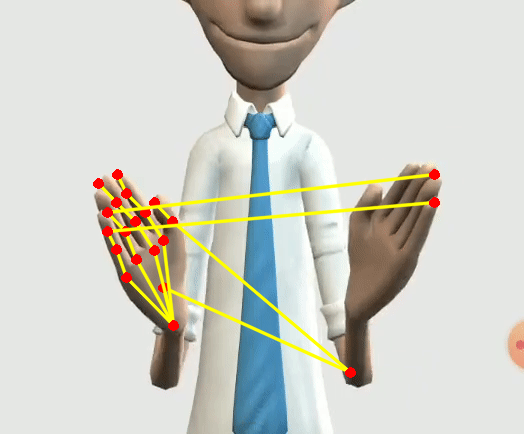

total = 7.738226890563965
forward = 7.723547697067261
Time Taken for frame = 7.741353273391724


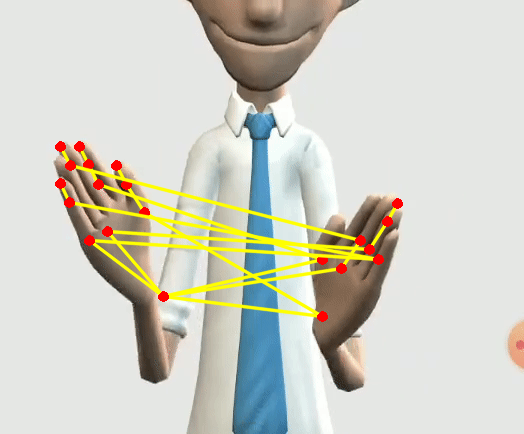

total = 7.776647567749023
forward = 7.625800132751465
Time Taken for frame = 7.643056392669678


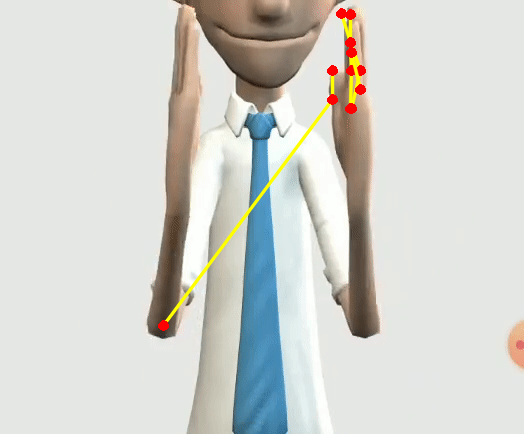

total = 7.675617694854736
forward = 7.6428444385528564
Time Taken for frame = 7.6591103076934814


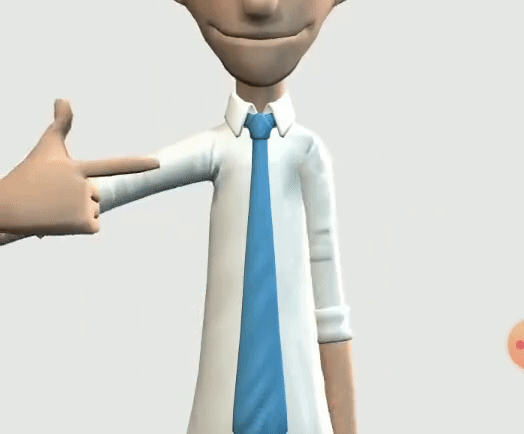

total = 7.692200422286987
forward = 7.664752721786499
Time Taken for frame = 7.681385517120361


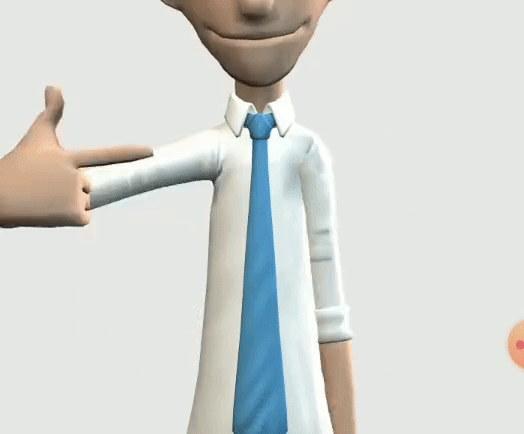

total = 7.711923837661743
forward = 7.605834722518921
Time Taken for frame = 7.625660181045532


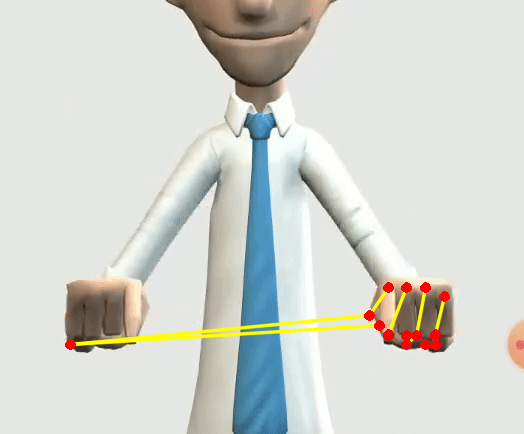

total = 7.657007455825806
forward = 7.601075649261475
Time Taken for frame = 7.619067907333374


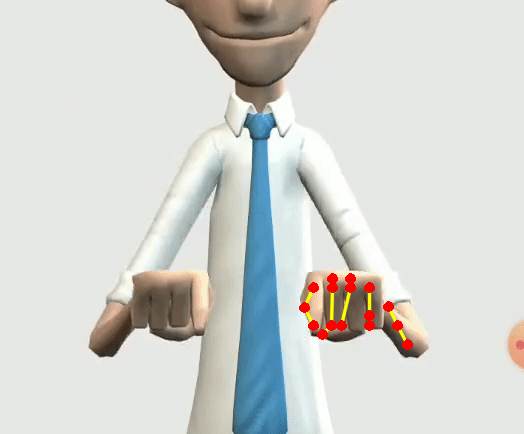

total = 7.65178370475769
forward = 7.580250978469849
Time Taken for frame = 7.597492933273315


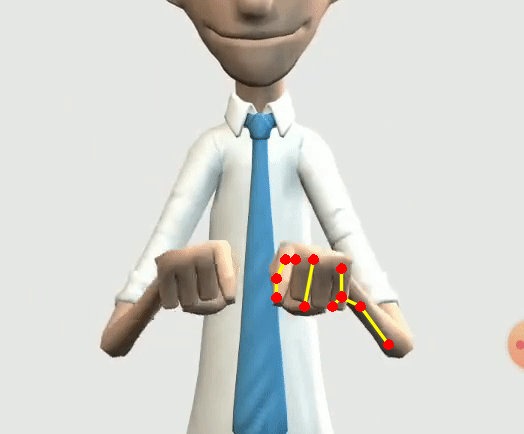

total = 7.628038644790649
forward = 7.601325273513794
Time Taken for frame = 7.618780612945557


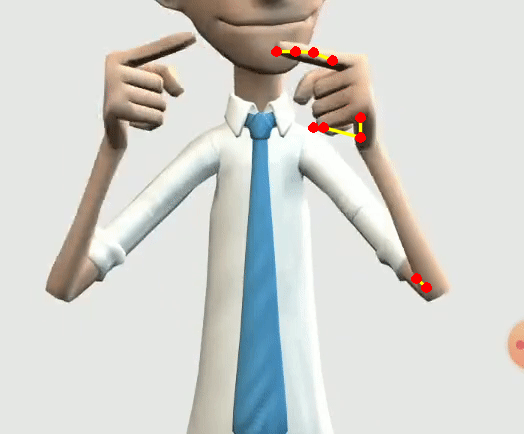

total = 7.653207302093506
forward = 7.595577716827393
Time Taken for frame = 7.61311149597168


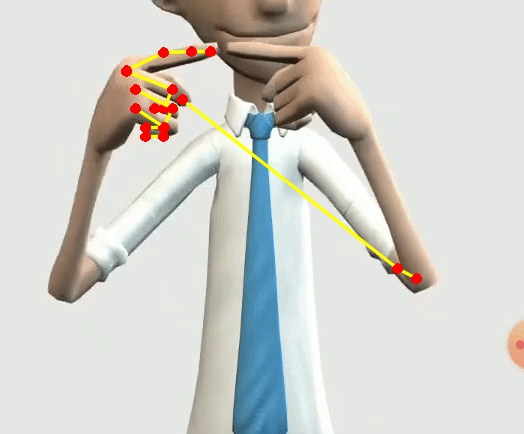

total = 7.648191690444946
forward = 7.553326606750488
Time Taken for frame = 7.57085394859314


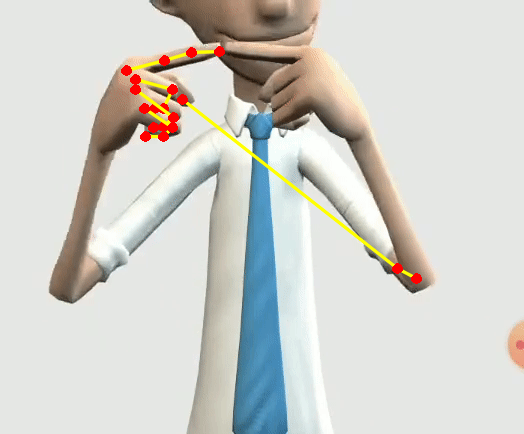

total = 7.605363607406616
forward = 7.583571195602417
Time Taken for frame = 7.601494073867798


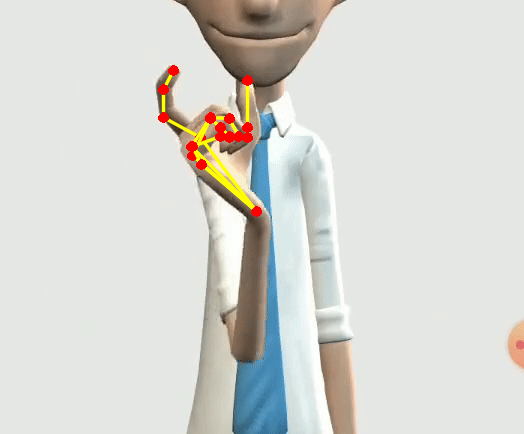

total = 7.628917932510376
forward = 7.657922267913818
Time Taken for frame = 7.675962686538696


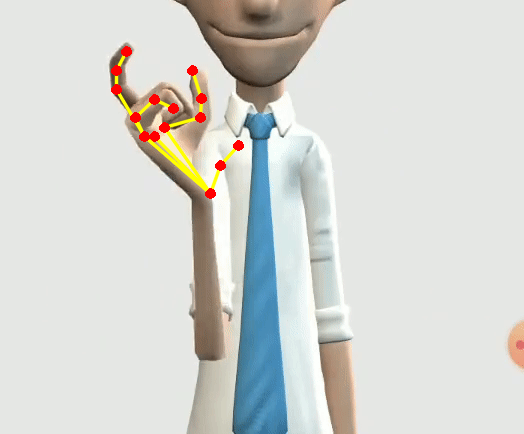

total = 7.706003427505493


In [22]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

protoFile = "/content/Acessibilidade_Parte_3_Angulo_dedos/pose_deploy.prototxt"
weightsFile = "pose_iter_102000.caffemodel"
nPoints = 22
POSE_PAIRS = [ [0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20] ]

threshold = 0.2


input_source = "/content/Acessibilidade_Parte_3_Angulo_dedos/hugo.gif"
cap = cv2.VideoCapture(input_source)
hasFrame, frame = cap.read()

frameWidth = frame.shape[1]
frameHeight = frame.shape[0]

aspect_ratio = frameWidth/frameHeight

inHeight = 368
inWidth = int(((aspect_ratio*inHeight)*8)//8)

vid_writer = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 15, (frame.shape[1],frame.shape[0]))

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
k = 0
while 1:
    k+=1
    t = time.time()
    hasFrame, frame = cap.read()
    frameCopy = np.copy(frame)
    if not hasFrame:
        cv2.waitKey()
        break

    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                              (0, 0, 0), swapRB=False, crop=False)

    net.setInput(inpBlob)

    output = net.forward()

    print("forward = {}".format(time.time() - t))

    # Empty list to store the detected keypoints
    points = []

    for i in range(nPoints):
        # confidence map of corresponding body's part.
        probMap = output[0, i, :, :]
        probMap = cv2.resize(probMap, (frameWidth, frameHeight))

        # Find global maxima of the probMap.
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

        if prob > threshold :
            cv2.circle(frameCopy, (int(point[0]), int(point[1])), 6, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

            # Add the point to the list if the probability is greater than the threshold
            points.append((int(point[0]), int(point[1])))
        else :
            points.append(None)

    # Draw Skeleton
    for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]

        if points[partA] and points[partB]:
            cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2, lineType=cv2.LINE_AA)
            cv2.circle(frame, points[partA], 5, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)
            cv2.circle(frame, points[partB], 5, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

    print("Time Taken for frame = {}".format(time.time() - t))

    # cv2.putText(frame, "time taken = {:.2f} sec".format(time.time() - t), (50, 50), cv2.FONT_HERSHEY_COMPLEX, .8, (255, 50, 0), 2, lineType=cv2.LINE_AA)
    # cv2.putText(frame, "Hand Pose using OpenCV", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 50, 0), 2, lineType=cv2.LINE_AA)
    cv2_imshow(frame)
    # cv2.imwrite("video_output/{:03d}.jpg".format(k), frame)
    key = cv2.waitKey(1)
    if key == 27:
        break

    print("total = {}".format(time.time() - t))

    vid_writer.write(frame)

vid_writer.release()